In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
data = pd.read_csv("covtype.data", header=None)
column_names = ["Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology",
                "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways",
                "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm",
                "Horizontal_Distance_To_Fire_Points"]
wilderness_areas = ["Wilderness_Area" + str(i) for i in range(1, 5)]
column_names.extend(wilderness_areas)
soil_types = ["Soil_Type" + str(i) for i in range(1, 41)]
column_names.extend(soil_types)
column_names.append("Cover_Type")
data.columns = column_names
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [36]:
data.shape

(581012, 55)

# Ejercicio 1

In [37]:
data['Soil_Type'] = data[['Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
                      'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
                      'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15',
                      'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
                      'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25',
                      'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
                      'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35',
                      'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']].sum(axis=1)

data['Wilderness_Area'] = data[['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']].sum(axis=1)
data = data.drop(columns=['Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
                      'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
                      'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15',
                      'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
                      'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25',
                      'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
                      'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35',
                      'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40'])

data = data.drop(columns=['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4'])
data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Soil_Type,Wilderness_Area
0,2596,51,3,258,0,510,221,232,148,6279,5,1,1
1,2590,56,2,212,-6,390,220,235,151,6225,5,1,1
2,2804,139,9,268,65,3180,234,238,135,6121,2,1,1
3,2785,155,18,242,118,3090,238,238,122,6211,2,1,1
4,2595,45,2,153,-1,391,220,234,150,6172,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,3,1,1
581008,2391,152,19,67,12,95,240,237,119,845,3,1,1
581009,2386,159,17,60,7,90,236,241,130,854,3,1,1
581010,2384,170,15,60,5,90,230,245,143,864,3,1,1


In [38]:
random_state = 100

# Ejercicio 2

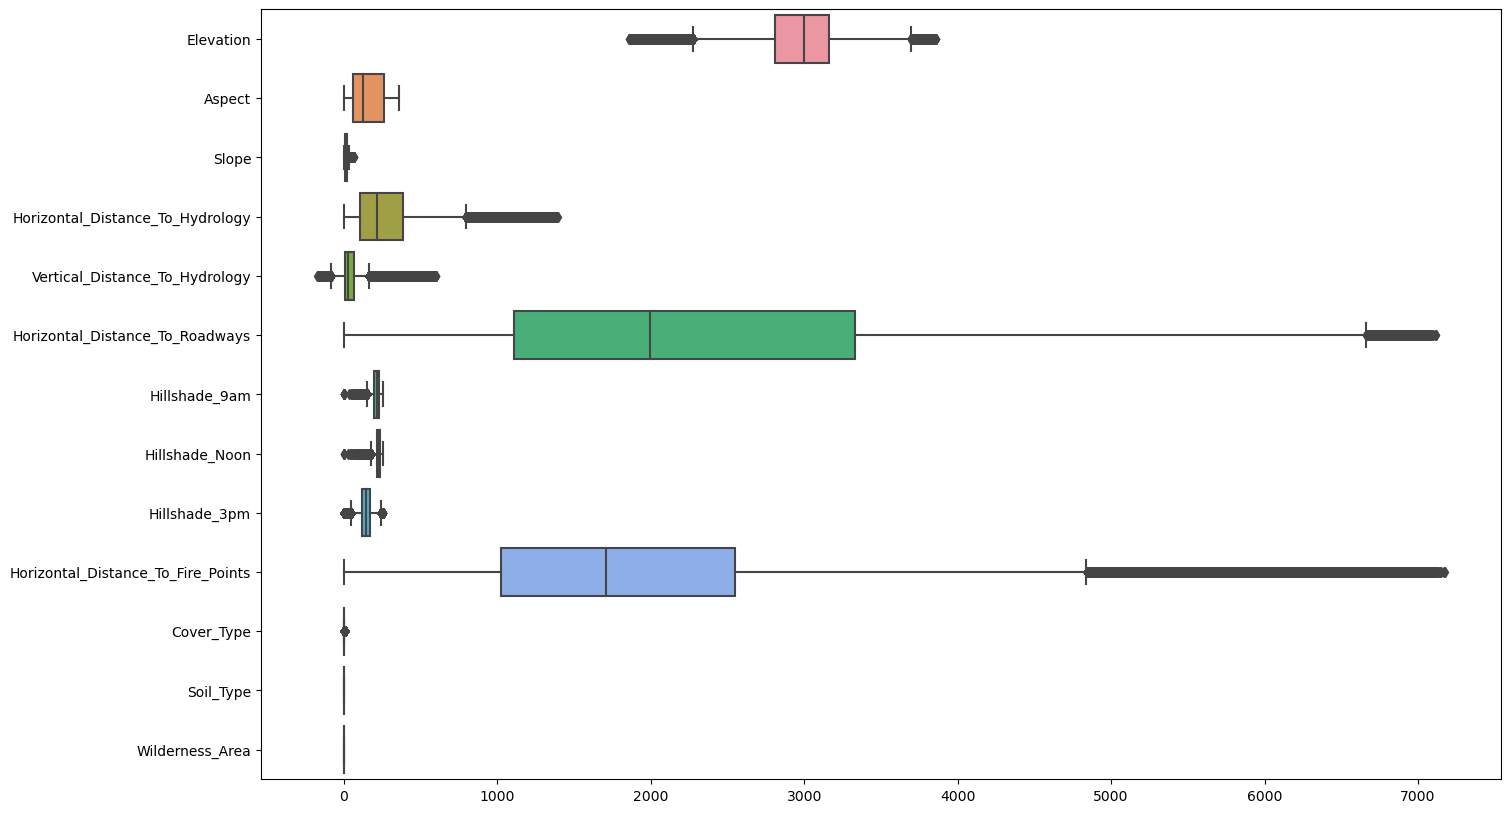

In [39]:
plt.figure(figsize=(16,10))
sns.boxplot(data=data, orient="h")
plt.show()

Normalizar las variables:

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

data_scaled

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Soil_Type,Wilderness_Area
0,-1.297805,-0.935157,-1.482820,-0.053767,-0.796273,-1.180146,0.330743,0.439143,0.142960,3.246283,2.111366,0.0,0.0
1,-1.319235,-0.890480,-1.616363,-0.270188,-0.899197,-1.257106,0.293388,0.590899,0.221342,3.205504,2.111366,0.0,0.0
2,-0.554907,-0.148836,-0.681563,-0.006719,0.318742,0.532212,0.816364,0.742654,-0.196691,3.126965,-0.036857,0.0,0.0
3,-0.622768,-0.005869,0.520322,-0.129044,1.227908,0.474492,0.965786,0.742654,-0.536343,3.194931,-0.036857,0.0,0.0
4,-1.301377,-0.988770,-1.616363,-0.547771,-0.813427,-1.256464,0.293388,0.540313,0.195215,3.165479,2.111366,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,-2.012130,-0.023740,0.787408,-0.867697,-0.504653,-1.437962,1.040496,0.692069,-0.640851,-0.863386,0.679218,0.0,0.0
581008,-2.029988,-0.032675,0.653865,-0.952383,-0.590424,-1.446299,1.040496,0.692069,-0.614724,-0.857345,0.679218,0.0,0.0
581009,-2.047847,0.029873,0.386780,-0.985317,-0.676194,-1.449506,0.891075,0.894409,-0.327327,-0.850548,0.679218,0.0,0.0
581010,-2.054990,0.128163,0.119694,-0.985317,-0.710502,-1.449506,0.666942,1.096749,0.012325,-0.842997,0.679218,0.0,0.0


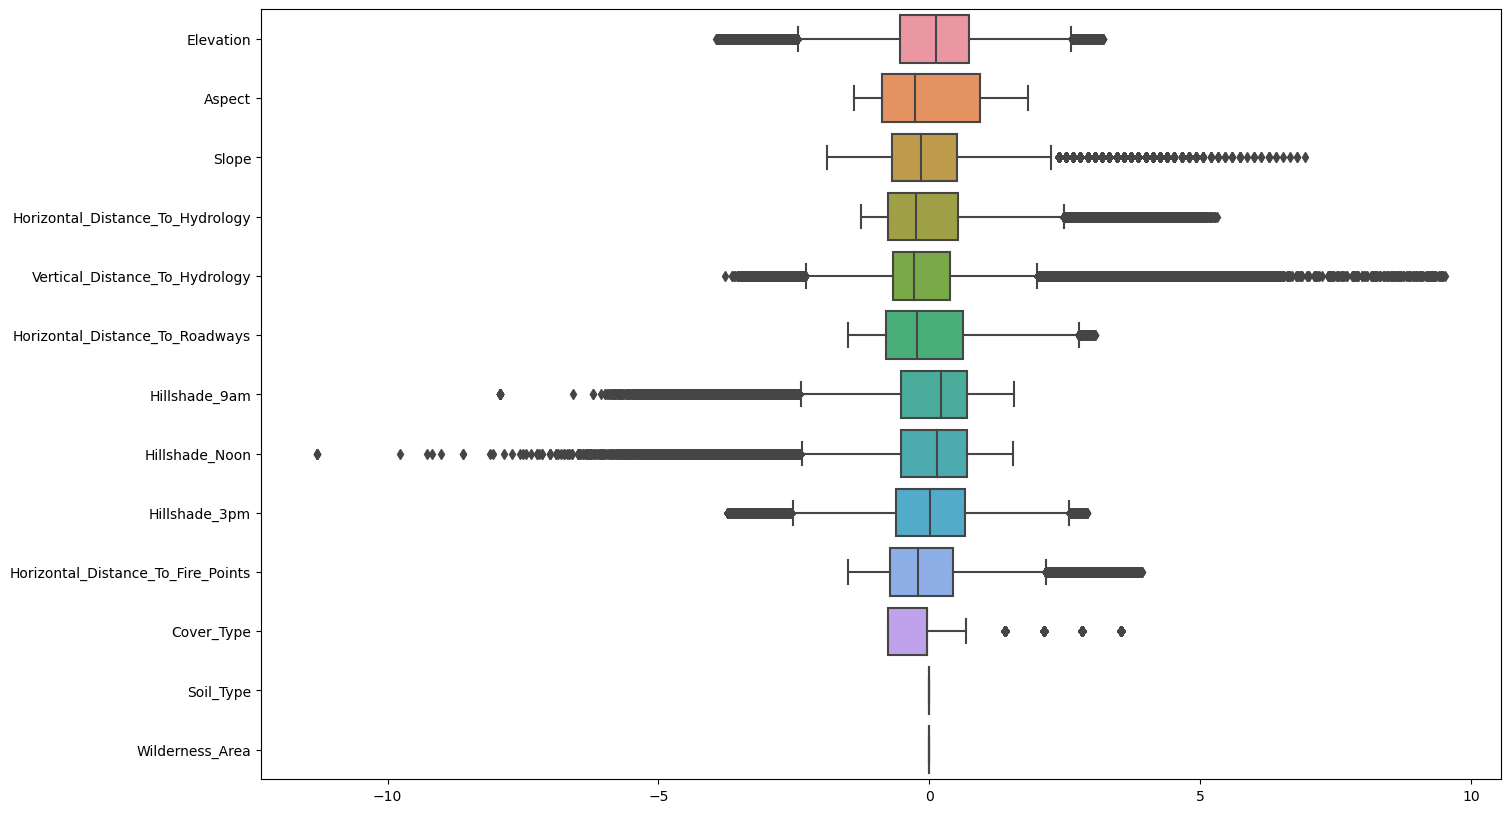

In [41]:
plt.figure(figsize=(16,10))
sns.boxplot(data=data_scaled, orient="h")
plt.show()

# Ejericio 3

3.1

In [42]:
from sklearn.model_selection import train_test_split

X = data_scaled.drop(columns=['Cover_Type'])
y = data_scaled['Cover_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

In [43]:
X_test.to_csv("X_test.csv", index = False)
y_test.to_csv("y_test.csv", index = False)

In [44]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=random_state)

In [45]:
random_state = 100

3.2

In [46]:
max_iter = 1000

In [47]:
random_state = 100

3.3